# ***Customer Service Requests Analysis.***
**Analysis of service request (311) calls from New York City**








##Problem statement:
-----------------------------------------------------------
  The problem is to perform data analysis of service request (311) calls from New York City and to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

### Importing the required library

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the google drive to access the dataset

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Simplilearn/csv

/content/drive/MyDrive/Simplilearn/csv


## Understanding the data

1.1 Import the dataset

In [ ]:
df_cust=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

<ipython-input-4-6ee90d17bc99>:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cust=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


 Visualize the dataset

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_cust.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2016 07:59:45 AM,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01/01/2016 07:59:44 AM,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2016 07:59:29 AM,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [ ]:
df_cust.tail(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01/01/2015 08:01:30 AM,The Police Department responded to the complai...,01/01/2015 12:20:33 AM,09 MANHATTAN,MANHATTAN,997847.0,238629.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01/01/2015 08:01:29 AM,The Police Department responded and upon arriv...,01/01/2015 02:42:22 AM,12 BRONX,BRONX,1024816.0,262237.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,135 STREET,ROCKAWAY BOULEVARD,SUTTER AVENUE,NaN,NaN,ADDRESS,SOUTH OZONE PARK,NaN,Precinct,Closed,01/01/2015 08:00:50 AM,The Police Department responded to the complai...,01/01/2015 02:47:50 AM,10 QUEENS,QUEENS,1038733.0,184971.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


##Print the columns of the DataFrame

In [ ]:
print(f"The total number of columns in given dataset is {len(df_cust.columns)}.")
print('The columns are :')
print('---------------------------------------------------')
for i in range(0,len(df_cust.columns),2):
  if i!=len(df_cust.columns)-1:
    print(f'{df_cust.columns[i]},{df_cust.columns[i+1]}')
print('---------------------------------------------------')


The total number of columns in given dataset is 53.
The columns are :
---------------------------------------------------
Unique Key,Created Date
Closed Date,Agency
Agency Name,Complaint Type
Descriptor,Location Type
Incident Zip,Incident Address
Street Name,Cross Street 1
Cross Street 2,Intersection Street 1
Intersection Street 2,Address Type
City,Landmark
Facility Type,Status
Due Date,Resolution Description
Resolution Action Updated Date,Community Board
Borough,X Coordinate (State Plane)
Y Coordinate (State Plane),Park Facility Name
Park Borough,School Name
School Number,School Region
School Code,School Phone Number
School Address,School City
School State,School Zip
School Not Found,School or Citywide Complaint
Vehicle Type,Taxi Company Borough
Taxi Pick Up Location,Bridge Highway Name
Bridge Highway Direction,Road Ramp
Bridge Highway Segment,Garage Lot Name
Ferry Direction,Ferry Terminal Name
Latitude,Longitude
---------------------------------------------------


1.4 Identify the shape of the dataset

In [ ]:
df_cust.shape
print('***************************************************')
print(f'There are totally {df_cust.shape[0]} rows and {df_cust.shape[1]} columns.')
print('***************************************************')

***************************************************
There are totally 364558 rows and 53 columns.
***************************************************


1.5 Identify the variables with null values

In [ ]:
count=0
for column in df_cust.columns:
  if df_cust[column].isna().sum()>0:
    print("%-30s %-3d" %(column,df_cust[column].isna().sum()))
    count=count+1
print(f'There are totally {count} columns with null values')

Closed Date                    2381
Descriptor                     6501
Location Type                  133
Incident Zip                   2998
Incident Address               51699
Street Name                    51699
Cross Street 1                 57188
Cross Street 2                 57805
Intersection Street 1          313438
Intersection Street 2          314046
Address Type                   3252
City                           2997
Landmark                       364183
Facility Type                  2389
Due Date                       3  
Resolution Action Updated Date 2402
X Coordinate (State Plane)     4030
Y Coordinate (State Plane)     4030
School Region                  1  
School Code                    1  
School Zip                     1  
School or Citywide Complaint   364558
Vehicle Type                   364558
Taxi Company Borough           364558
Taxi Pick Up Location          364558
Bridge Highway Name            364261
Bridge Highway Direction       364261
Road Ramp  

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

** **2. Perform basic data exploratory analysis:**  **


---



**2.1 Draw a frequency plot to show the number of null values in
each column of the DataFrame**

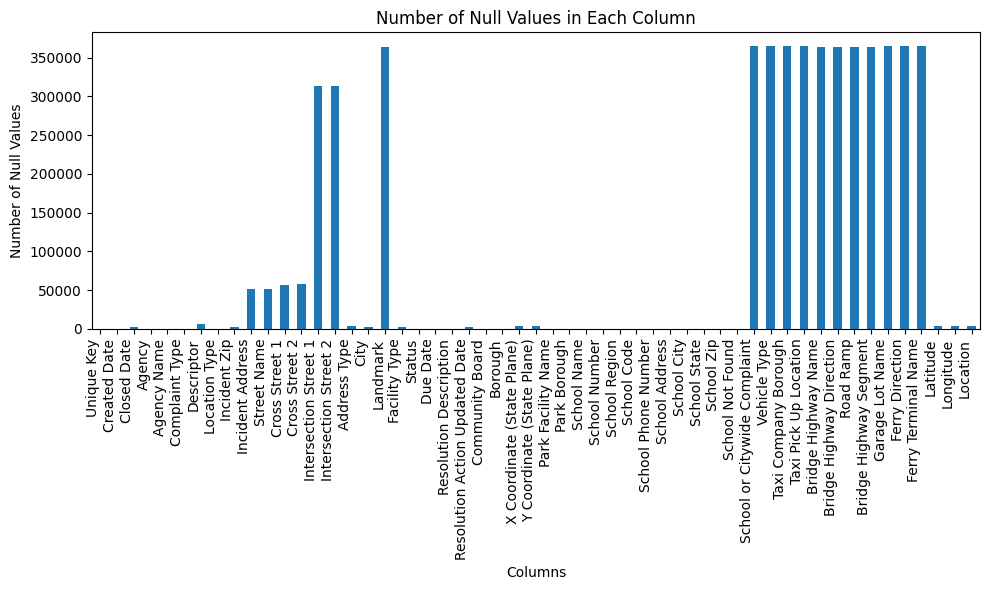

In [ ]:
# Count the number of null values in each column
null_counts = df_cust.isnull().sum()
# Plotting the frequency of null values in each column
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=90,ha='right')
plt.yticks(ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_cust.isnull().sum()/len(df_cust)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.653120
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.783255
Location Type                       0.036483
Incident Zip                        0.822366
Incident Address                   14.181283
Street Name                        14.181283
Cross Street 1                     15.686941
Cross Street 2                     15.856187
Intersection Street 1              85.977540
Intersection Street 2              86.144317
Address Type                        0.892039
City                                0.822091
Landmark                           99.897136
Facility Type                       0.655314
Status                              0.000000
Due Date                            0.000823
Resolution Description              0.000000
Resolution

***There are some optional columns as already given in the problem statement , and the same observed most of the data for this optional columns is null. So deleting those columns as part of handling the null values.***

In [ ]:
optional_columns=['School Name','School Number','School Region','School Code','School Phone Number','School Address','School City','School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name']

In [ ]:
print(len(optional_columns))

21


In [ ]:
for column in optional_columns:
  print(df_cust[column].isnull().sum()/len(df_cust)*100)

0.0
0.0
0.00027430477454890576
0.00027430477454890576
0.0
0.0
0.0
0.0
0.00027430477454890576
0.0
100.0
100.0
100.0
100.0
99.91853148195898
99.91853148195898
99.92813214906818
99.92813214906818
100.0
99.99972569522545
99.9994513904509


#### The above columns have been given as optional as part of problem statement , dropping the above columns as we see that the columns have most of the null values. As they affect to understand the data better and while building the model.

In [ ]:
print("Dropping the optional columns from dataframe")
df_cust.drop(optional_columns,axis='columns',inplace=True)
print("-------------Dropped optional columns-------------")

Dropping the optional columns from dataframe
-------------Dropped optional columns-------------


In [ ]:
df_cust.shape

(364558, 32)

In [ ]:
df_cust.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [ ]:
above85_NullColumnsList=[]


for column in df_cust.columns:
  count = df_cust[column].isnull().sum()/len(df_cust)*100
  if count > 85 :
    above85_NullColumnsList.append(column)


print(above85_NullColumnsList)
print(f'There are totally {len(above85_NullColumnsList)} columns with Null values above 85%.')

['Intersection Street 1', 'Intersection Street 2', 'Landmark']
There are totally 3 columns with Null values above 85%.


In [ ]:
df_cust.drop(above85_NullColumnsList,axis=1,inplace=True)

In [ ]:
df_cust.shape

(364558, 29)

In [ ]:
df_cust['Location Type'].value_counts()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

**2.2.1 Remove the records whose Closed Date values are
null**

In [ ]:
df_cust['Closed Date'].isna().sum()

2381

In [ ]:
print("Dropping the null values from closed date columns from dataframe")
df_cust.dropna(subset='Closed Date',inplace=True)
print("-------------Dropped-------------")

Dropping the null values from closed date columns from dataframe
-------------Dropped-------------


In [ ]:
df_cust['Closed Date'].isna().sum()

0

Analyze the date column, and remove entries that have an
incorrect timeline
* 2.3.1 Calculate the time elapsed in closed and creation date
* 2.3.2 Convert the calculated date to seconds to get a better
representation
* 2.3.3 View the descriptive statistics for the newly created
column

In [ ]:
df_cust['Created Date']= pd.to_datetime(df_cust['Created Date'])

In [ ]:
df_cust['Closed Date']= pd.to_datetime(df_cust['Closed Date'])

In [ ]:
df_cust['Closed Date'].head(3)

0   2016-01-01 00:55:15
1   2016-01-01 01:26:57
2   2016-01-01 04:51:03
Name: Closed Date, dtype: datetime64[ns]

In [ ]:
df_cust['ClosureDateDiff']=df_cust['Closed Date']-df_cust['Created Date']
df_cust['ClosureDateDiff'].head(3)

0   0 days 00:55:30
1   0 days 01:27:13
2   0 days 04:51:34
Name: ClosureDateDiff, dtype: timedelta64[ns]

In [ ]:
df_cust['Seconds']=df_cust['ClosureDateDiff'].dt.total_seconds()
df_cust['Seconds'].head(3)

0     3330.0
1     5233.0
2    17494.0
Name: Seconds, dtype: float64

View the descriptive statistics for the newly created
column

In [ ]:
df_cust['Seconds'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Seconds, dtype: float64

In [ ]:
df_cust['Minutes']=df_cust['Seconds']/60

In [ ]:
df_cust['Minutes'].describe()

count    362177.000000
mean        251.888327
std         351.709125
min           1.016667
25%          75.550000
50%         160.266667
75%         314.633333
max       35572.366667
Name: Minutes, dtype: float64

* The complaints have been resolved with in 4 hours .
* As one complaint which is resolved in 2 days which can act as outlier which is increasing the mean time.


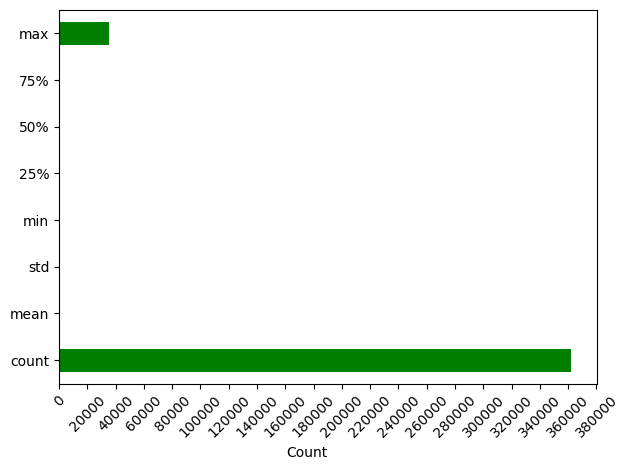

In [ ]:
df_cust['Minutes'].describe().plot(kind='barh',color='green')
plt.xticks(np.arange(0,400000,20000),rotation=45)
plt.xlabel('Count',ha='right')
plt.tight_layout()
plt.show()

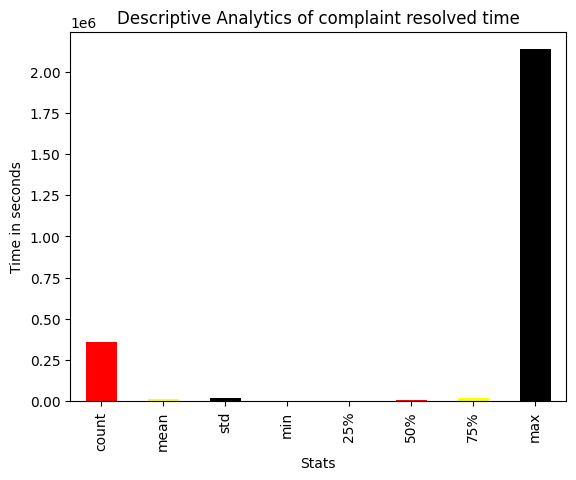

In [ ]:
## Drawing plot for resolved time
c = ['red', 'yellow', 'black', 'blue', 'orange']
#bar plot
df_cust['Seconds'].describe().plot(kind='bar',color = c)
plt.title('Descriptive Analytics of complaint resolved time')
plt.xlabel('Stats')
plt.ylabel('Time in seconds')
plt.show()

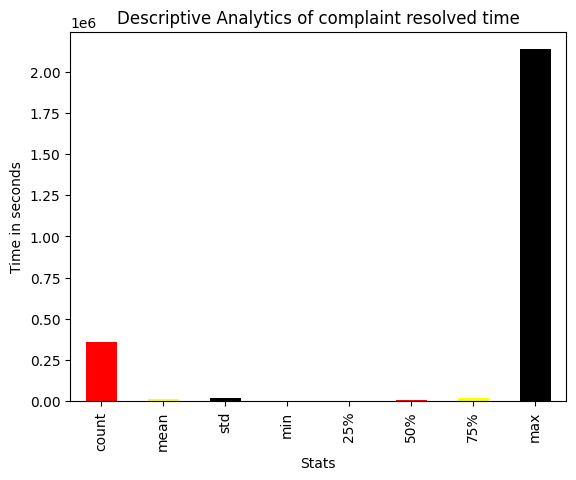

In [ ]:
## Drawing plot for resolved time
c = ['red', 'yellow', 'black', 'blue', 'orange']
#bar plot
df_cust['Seconds'].describe().plot(kind='bar',color = c)
plt.title('Descriptive Analytics of complaint resolved time')
plt.xlabel('Stats')
plt.ylabel('Time in seconds')
plt.show()

2.3.4 Check the number of null values in the Complaint_Type
and City columns

In [ ]:
df_cust[['Complaint Type','City']].isna().sum()

Complaint Type      0
City              674
dtype: int64

2.3.5 Impute the NA value with Unknown City

In [ ]:
df_cust['City']=df_cust['City'].fillna('Unknown City')

In [ ]:
df_cust[['Complaint Type','City']].isna().sum()

Complaint Type    0
City              0
dtype: int64

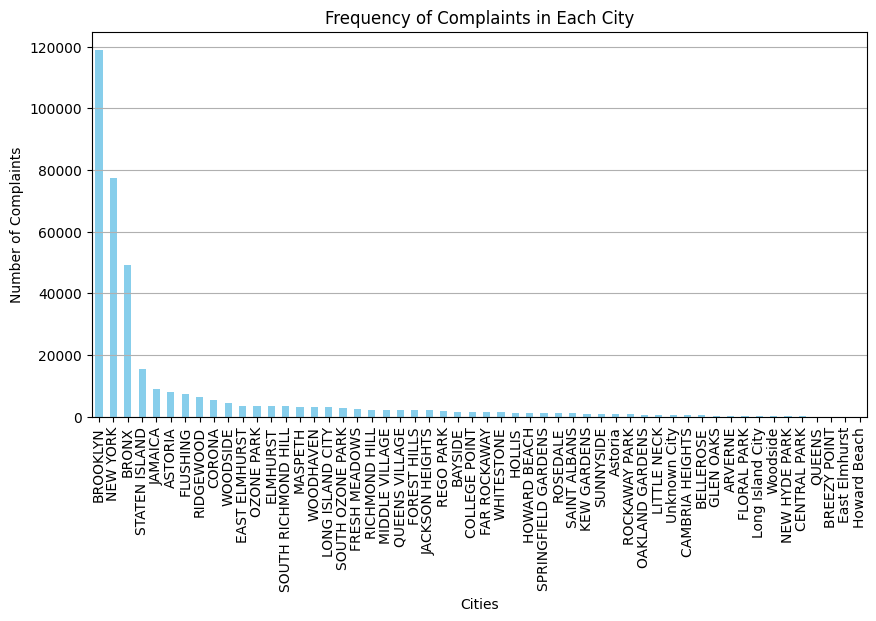

In [ ]:
# Count complaints in each city
city_complaints = df_cust['City'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))
city_complaints.plot(kind='bar', color='skyblue')
plt.xlabel('Cities')
plt.ylabel('Number of Complaints')
plt.title('Frequency of Complaints in Each City')
plt.grid(axis='y')

# Show plot
plt.show()

2.3.7 Create a scatter and hexbin plot of the concentration of
complaints across Brooklyn

In [ ]:
city_name=('Brooklyn').upper()

In [ ]:
x_df=df_cust[df_cust['City']==city_name]
pd.set_option('display.max_columns', None)
x_df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,ClosureDateDiff,Seconds,Minutes
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,6 AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:56:30 AM,The Police Department responded and upon arriv...,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,Unspecified,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:41,6821.0,113.683333
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,NEW UTRECHT AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:53:58 AM,The Police Department responded and upon arriv...,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,Unspecified,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:42,5022.0,83.700000
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,CRESCENT STREET,DEAD END,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:47:58 AM,The Police Department responded to the complai...,01/01/2016 08:18:47 AM,05 BROOKLYN,BROOKLYN,1019054.0,189780.0,Unspecified,BROOKLYN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0 days 08:30:49,30649.0,510.816667
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,3 AVENUE,4 AVENUE,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:44:52 AM,The Police Department responded to the complai...,01/01/2016 12:36:10 AM,06 BROOKLYN,BROOKLYN,988846.0,186711.0,Unspecified,BROOKLYN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",0 days 00:51:18,3078.0,51.300000
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,EAST 46 STREET,AVENUE O,ADDRESS,BROOKLYN,Precinct,Closed,01/01/2016 07:40:59 AM,The Police Department responded to the complai...,01/01/2016 02:37:28 AM,18 BROOKLYN,BROOKLYN,1003628.0,163910.0,Unspecified,BROOKLYN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",0 days 02:56:29,10589.0,176.483333


In [ ]:
x_df.groupby(x_df['Complaint Type']).size()

Complaint Type
Animal Abuse                  3191
Bike/Roller/Skate Chronic      124
Blocked Driveway             36445
Derelict Vehicle              6257
Disorderly Youth                79
Drinking                       291
Graffiti                        60
Homeless Encampment            948
Illegal Fireworks               61
Illegal Parking              33532
Noise - Commercial           13855
Noise - House of Worship       389
Noise - Park                  1575
Noise - Street/Sidewalk      13982
Noise - Vehicle               5965
Panhandling                     49
Posting Advertisement           58
Traffic                       1258
Urinating in Public            155
Vending                        575
dtype: int64

In [ ]:
complaint_counts = df_cust.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')

In [ ]:
complaint_counts.head(5)

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1


In [ ]:
city_data = df_cust[df_cust['City'] == city_name ]
complaint_counts = city_data['Complaint Type'].value_counts().reset_index(name='Count')

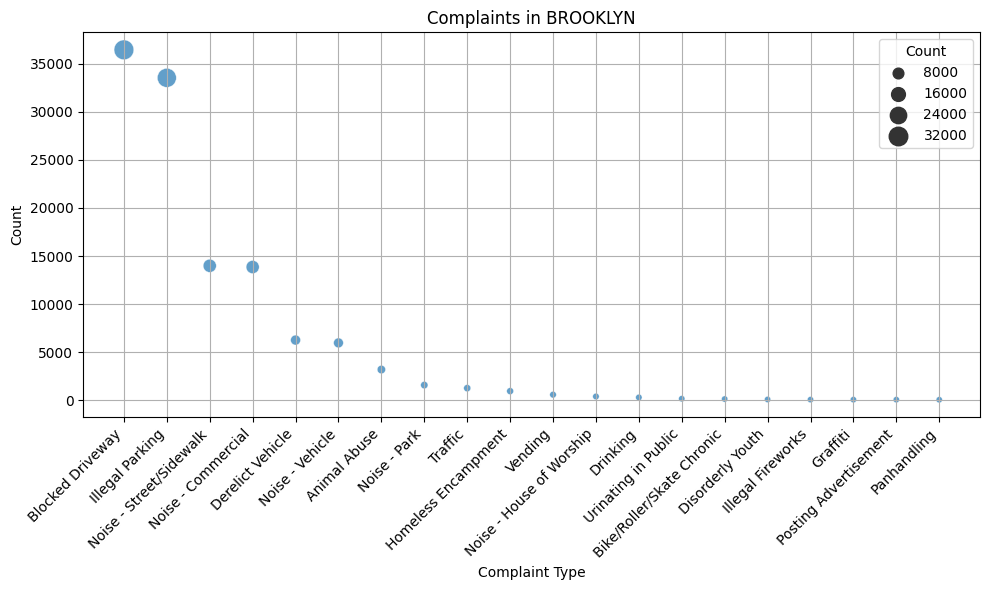

In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=complaint_counts, x='index', y='Count', size='Count', sizes=(20, 200), alpha=0.7)
plt.title(f'Complaints in {city_name}')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right') # # Adjust rotation and horizontal alignment
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent label overlap
plt.show()

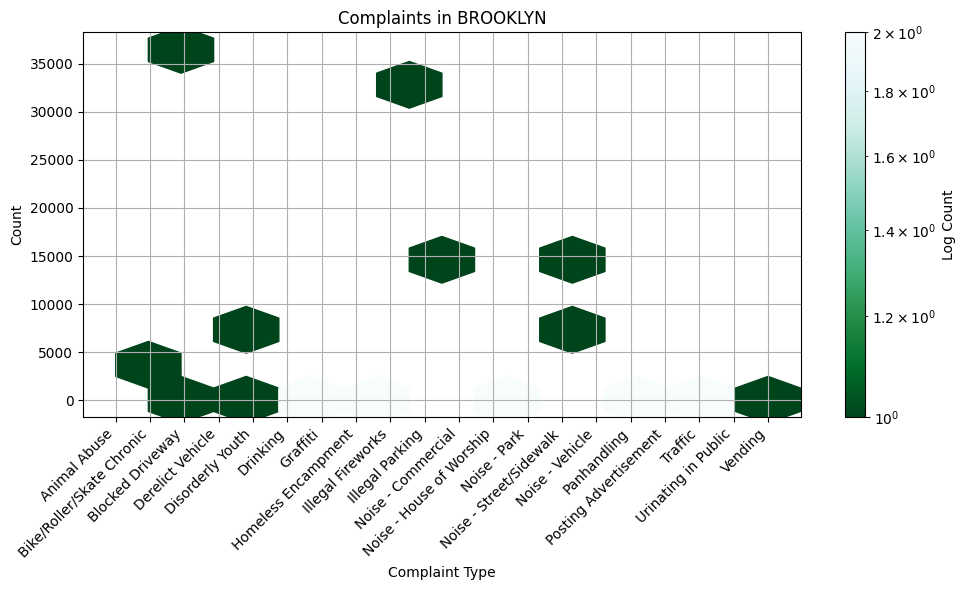

In [ ]:
complaint_counts['Complaint Type'] = pd.Categorical(complaint_counts['index'])
complaint_counts['Complaint Type'] = complaint_counts['Complaint Type'].cat.codes

# Create a hexbin plot using matplotlib
plt.figure(figsize=(10, 6))
plt.hexbin(complaint_counts['Complaint Type'], complaint_counts['Count'], gridsize=10, cmap='BuGn_r', bins='log')
plt.title(f'Complaints in {city_name}')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(ticks=complaint_counts['Complaint Type'], labels=complaint_counts['index'], rotation=45,ha='right') # # Adjust rotation and horizontal alignment
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent label overlap)
plt.colorbar(label='Log Count')
plt.show()

####3. Find major types of complaints:

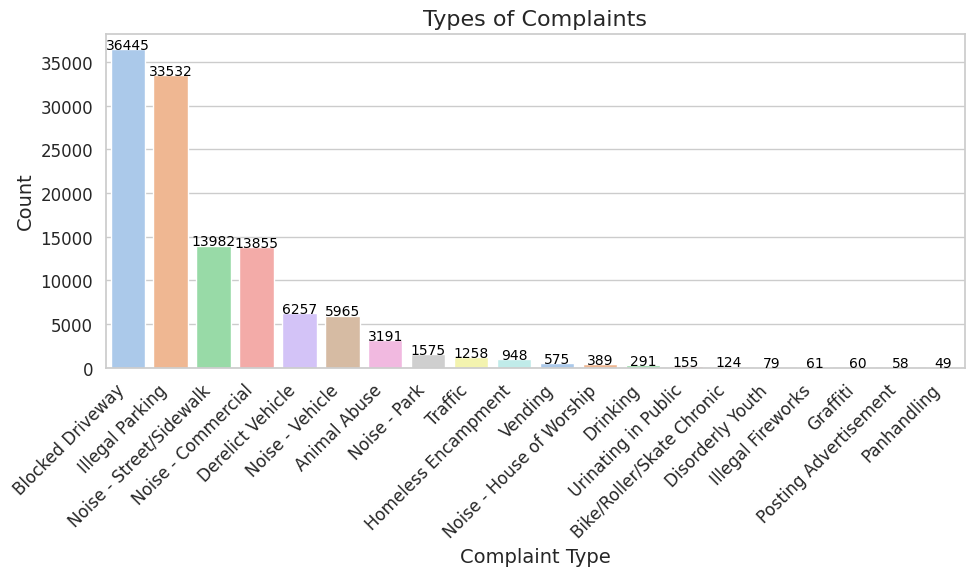

In [ ]:
# Set up the style and aesthetics
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn
palette = sns.color_palette("pastel")
barplot = sns.barplot(data=complaint_counts, x='index', y='Count', palette=palette)

# Customize labels and title
plt.title('Types of Complaints', fontsize=16)
plt.xlabel('Complaint Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of the bars
for index, row in complaint_counts.iterrows():
    barplot.text(index, row['Count'] + 0.2, row['Count'], color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()


Observation:
Majority of the complaints are of type Blocked Driveway ,Illegal Parking, and Noise.

**3.2 Check the frequency of various types of complaints for New
York City**

In [ ]:
nyc_data = df_cust[df_cust['City'] == 'NEW YORK']

# Count occurrences of each complaint type in New York City
nyc_complaint_counts = nyc_data['Complaint Type'].value_counts().reset_index(name='Count')

# Display the frequency of various types of complaints for New York City
print("Frequency of Various Types of Complaints for New York City:")
print(nyc_complaint_counts)

Frequency of Various Types of Complaints for New York City:
                        index  Count
0     Noise - Street/Sidewalk  22245
1          Noise - Commercial  18686
2             Illegal Parking  14549
3             Noise - Vehicle   6294
4         Homeless Encampment   3060
5            Blocked Driveway   2705
6                     Vending   2638
7                Animal Abuse   1941
8                     Traffic   1769
9                Noise - Park   1243
10           Derelict Vehicle    695
11                   Drinking    321
12        Urinating in Public    264
13  Bike/Roller/Skate Chronic    254
14   Noise - House of Worship    222
15                Panhandling    206
16           Disorderly Youth     81
17      Posting Advertisement     49
18          Illegal Fireworks     38
19                   Graffiti     25
20                   Squeegee      4


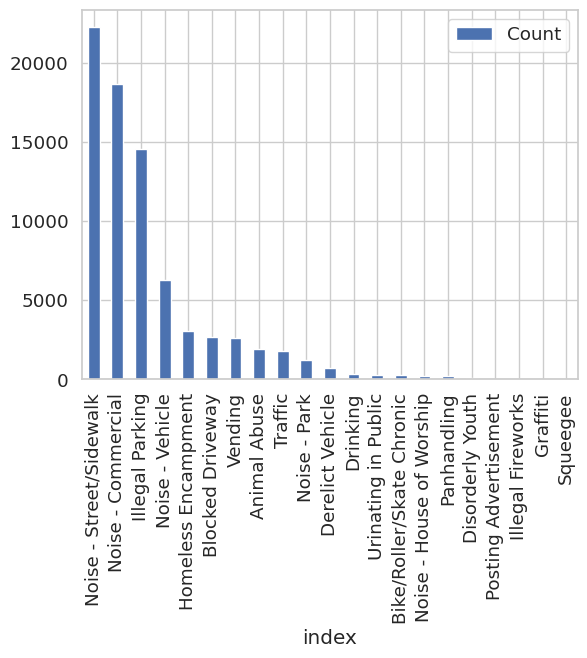

In [ ]:
nyc_complaint_counts.plot(kind='bar',x='index',y='Count')
plt.show()

3.3 Find the top 10 complaint types

In [ ]:
complaint_count=df_cust['Complaint Type'].value_counts()

In [ ]:
complaint_count.head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

3.4 Display the various types of complaints in each city

In [ ]:
complaints_by_city = df_cust.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')

# Display the result
print(complaints_by_city)


                    City             Complaint Type  Count
0                ARVERNE               Animal Abuse     46
1                ARVERNE           Blocked Driveway     50
2                ARVERNE           Derelict Vehicle     32
3                ARVERNE           Disorderly Youth      2
4                ARVERNE                   Drinking      1
5                ARVERNE                   Graffiti      1
6                ARVERNE        Homeless Encampment      4
7                ARVERNE            Illegal Parking     62
8                ARVERNE         Noise - Commercial      2
9                ARVERNE   Noise - House of Worship     14
10               ARVERNE               Noise - Park      2
11               ARVERNE    Noise - Street/Sidewalk     29
12               ARVERNE            Noise - Vehicle     10
13               ARVERNE                Panhandling      1
14               ARVERNE                    Traffic      1
15               ARVERNE        Urinating in Public     

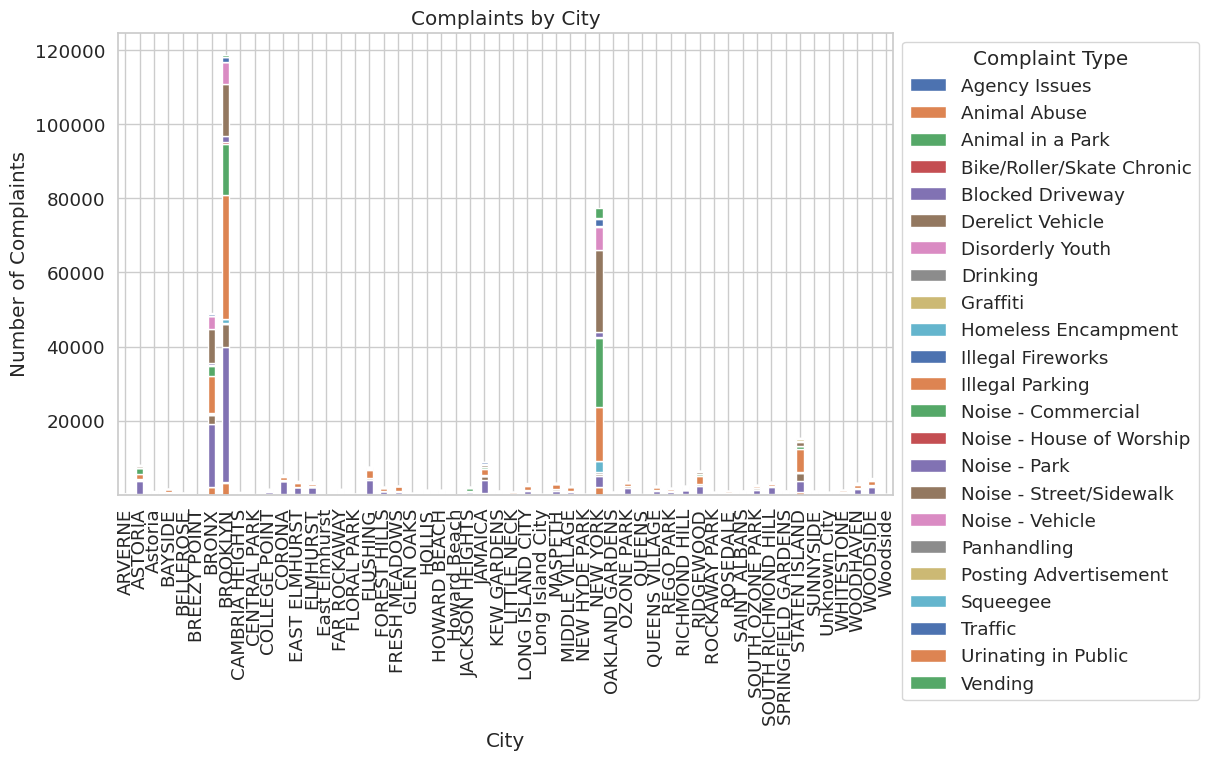

In [ ]:
complaints_pivot = complaints_by_city.pivot(index='City', columns='Complaint Type', values='Count').fillna(0)

# Plotting
complaints_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Complaints by City')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.legend(title='Complaint Type', bbox_to_anchor=(1, 1))
plt.show()

3.5 Create a DataFrame, df_new, which contains cities as
columns and complaint types in rows

In [ ]:
# Group by 'City' and 'Complaint Type' and count occurrences
complaints_by_city = df_cust.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')

# Pivot the DataFrame for easier plotting
df_new = complaints_by_city.pivot(index='Complaint Type', columns='City', values='Count').fillna(0)

# Reset index to remove the index name
df_new.reset_index(inplace=True)

print("DataFrame df_new:")
print(df_new.to_string(index=False))

DataFrame df_new:
           Complaint Type  ARVERNE  ASTORIA  Astoria  BAYSIDE  BELLEROSE  BREEZY POINT   BRONX  BROOKLYN  CAMBRIA HEIGHTS  CENTRAL PARK  COLLEGE POINT  CORONA  EAST ELMHURST  ELMHURST  East Elmhurst  FAR ROCKAWAY  FLORAL PARK  FLUSHING  FOREST HILLS  FRESH MEADOWS  GLEN OAKS  HOLLIS  HOWARD BEACH  Howard Beach  JACKSON HEIGHTS  JAMAICA  KEW GARDENS  LITTLE NECK  LONG ISLAND CITY  Long Island City  MASPETH  MIDDLE VILLAGE  NEW HYDE PARK  NEW YORK  OAKLAND GARDENS  OZONE PARK  QUEENS  QUEENS VILLAGE  REGO PARK  RICHMOND HILL  RIDGEWOOD  ROCKAWAY PARK  ROSEDALE  SAINT ALBANS  SOUTH OZONE PARK  SOUTH RICHMOND HILL  SPRINGFIELD GARDENS  STATEN ISLAND  SUNNYSIDE  Unknown City  WHITESTONE  WOODHAVEN  WOODSIDE  Woodside
            Agency Issues      0.0      0.0      0.0      0.0        0.0           0.0     0.0       0.0              0.0           0.0            0.0     0.0            0.0       0.0            0.0           0.0          0.0       0.0           0.0           

4. Visualize the major types of complaints in each city
* 4.1 Draw another chart that shows the types of complaints in
each city in a single chart, where different colors show the
different types of complaints

In [ ]:
complaints_by_city.head(5)

,City,Complaint Type,Count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1


<Figure size 1200x800 with 0 Axes>

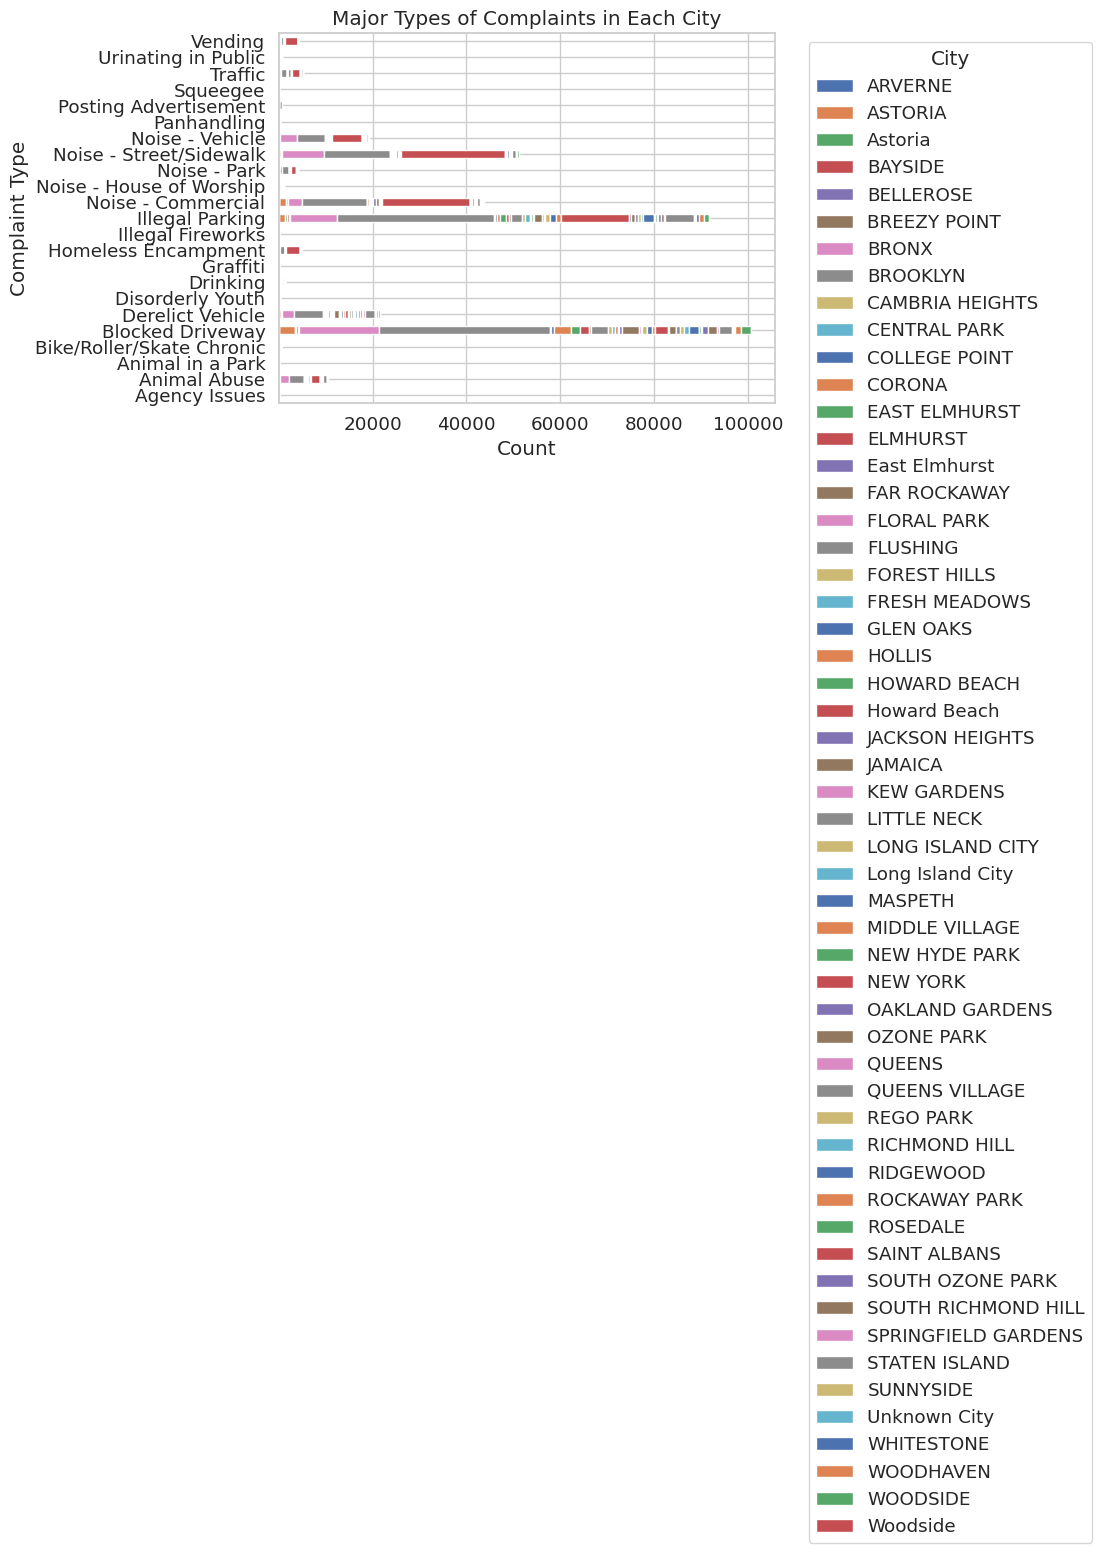

In [ ]:
# Create a horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = df_new.plot(kind='barh', stacked=True)
plt.title('Major Types of Complaints in Each City')
plt.xlabel('Count')
#plt.yticks(df_new['Complaint Type'])
plt.ylabel('Complaint Type')
ax.set_yticklabels(df_new['Complaint Type'])
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

4.2 Sort the complaint types based on the average
Request_Closing_Time grouping them for different
locations

In [ ]:


df_cust["ClosingTimeInMin"]=pd.to_timedelta(df_cust['ClosureDateDiff']).astype('timedelta64[m]').astype(int)
df_cust["ClosingTimeInMin"].head(3)

0     55
1     87
2    291
Name: ClosingTimeInMin, dtype: int64

In [ ]:
df_cust["ClosingTimeInMin"].describe()

count    362177.000000
mean        251.396370
std         351.709489
min           1.000000
25%          75.000000
50%         160.000000
75%         314.000000
max       35572.000000
Name: ClosingTimeInMin, dtype: float64


5.1 Visualize the average of Request_Closing_Time

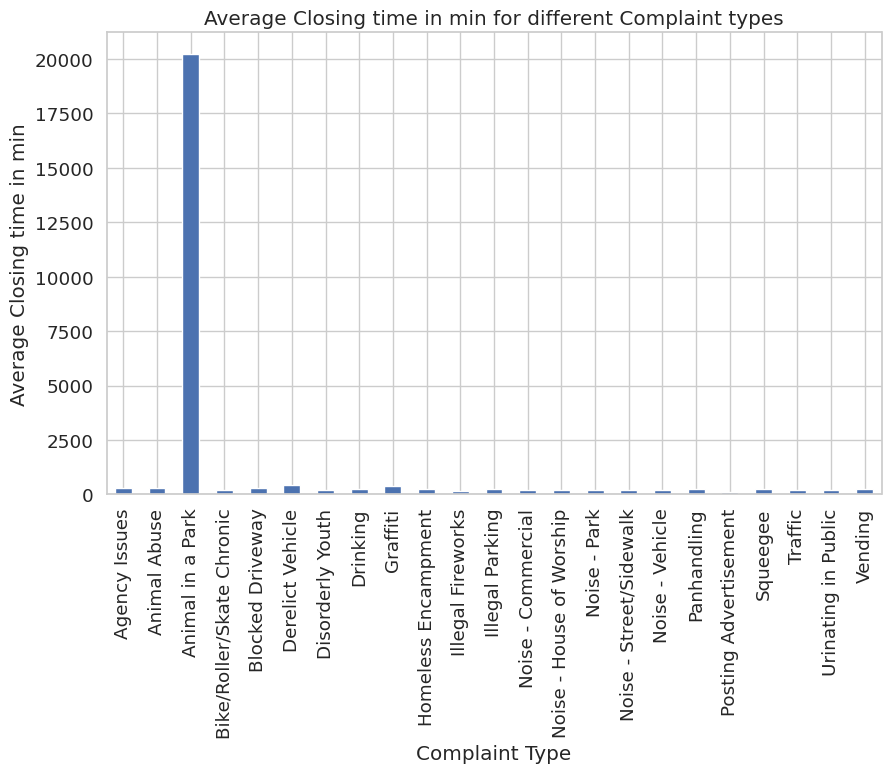

In [ ]:
df_cust.groupby('Complaint Type')['ClosingTimeInMin'].mean().plot(kind='bar',figsize=(10,6))
plt.title("Average Closing time in min for different Complaint types")
plt.xlabel("Complaint Type")
plt.ylabel("Average Closing time in min")
plt.show()

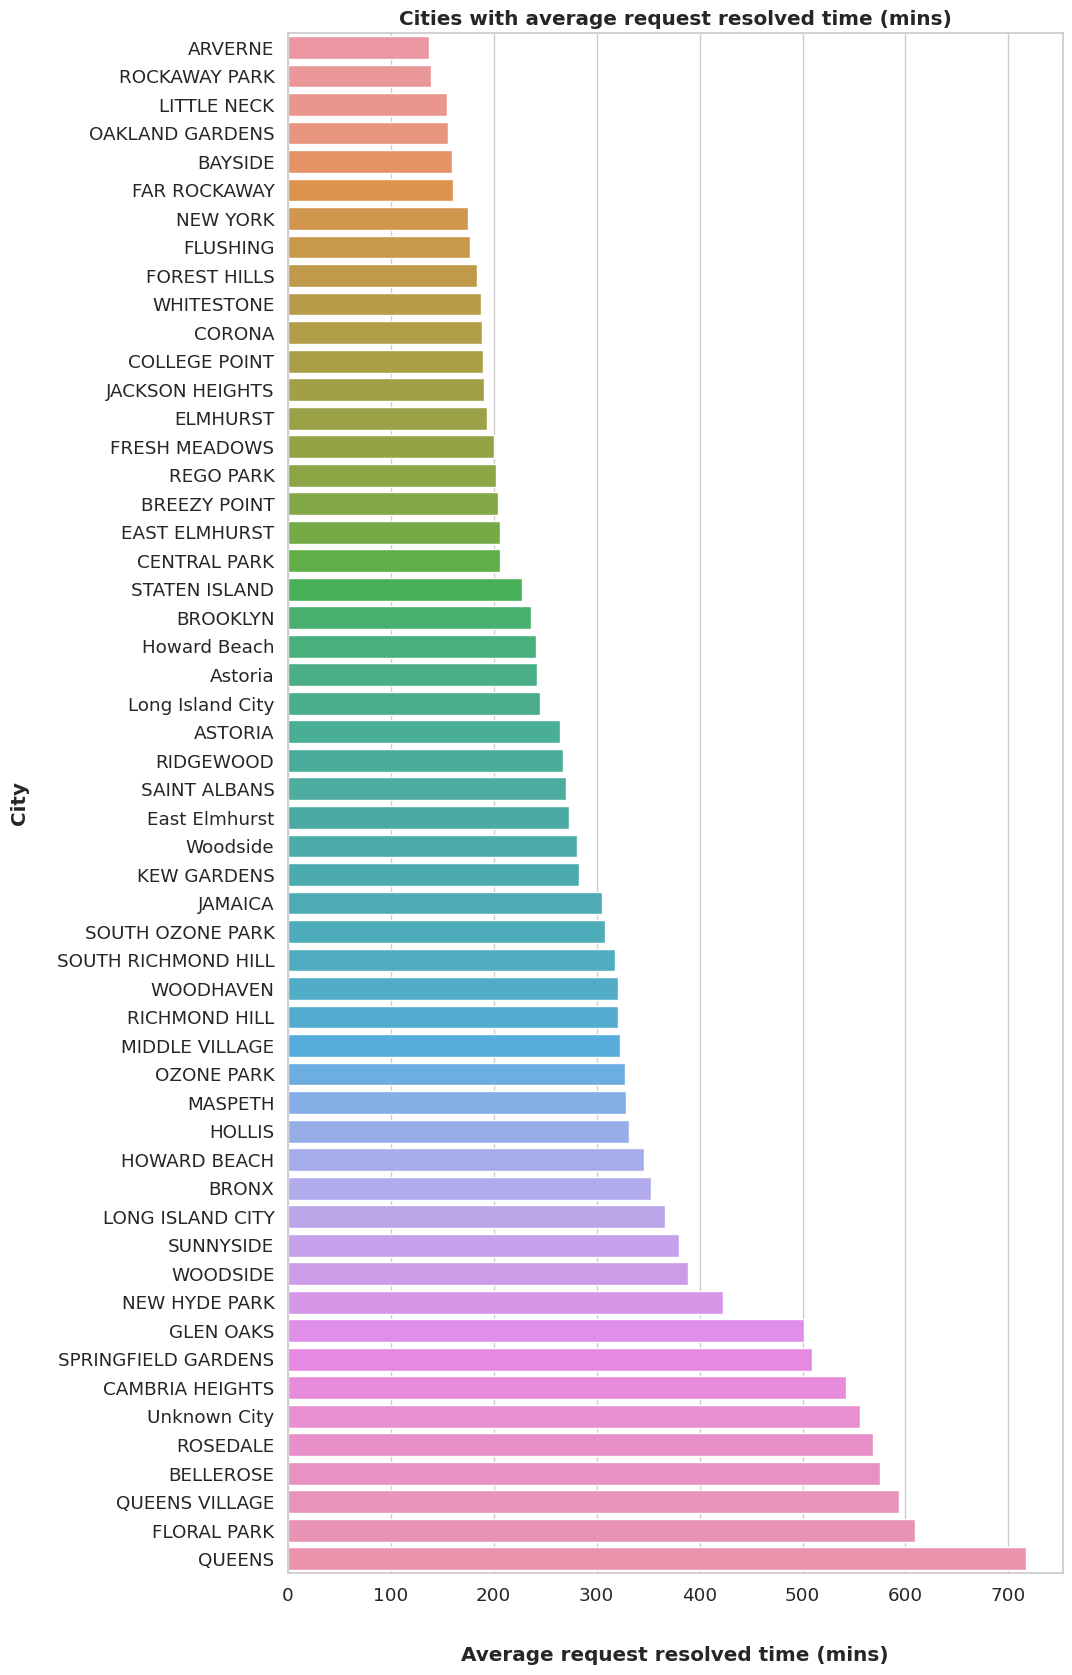

In [ ]:
CityDF= df_cust[['City','ClosingTimeInMin']]
CityDF_grp= CityDF.groupby('City')['ClosingTimeInMin'].mean().to_frame()
CityDF_grp= CityDF_grp.sort_values('ClosingTimeInMin')
CityDF_grp['City']= CityDF_grp.index
txt={'weight':'bold'}
plt.figure(figsize=(10,20))
sns.barplot(y='City',x='ClosingTimeInMin',data=CityDF_grp)
plt.title("Cities with average request resolved time (mins)",fontdict=txt)
plt.ylabel("City",fontdict=txt,labelpad=20)
plt.xlabel("Average request resolved time (mins)",fontdict=txt,labelpad=30)
plt.show()

Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [ ]:

dataset={}
for i in df_cust['Complaint Type'].unique():
    dataset[i]= np.log(df_cust[df_cust['Complaint Type']==i]['ClosingTimeInMin'])
# For statistical testing
# we would use ANOVA Testing
 #Null Hypothesis: The average response time across complaint types is not different
# Alternate Hypothesis: The average response time across complaint types is different
from scipy.stats import f_oneway
stat,p = f_oneway(dataset['Noise - Street/Sidewalk'], dataset['Blocked Driveway'], dataset['Illegal Parking'], dataset['Derelict Vehicle'],
                dataset['Noise - Commercial'])

alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


* Null Hypothesis : Complaint type and Location type are not related
* Alternative Hypothesis : Complaint type and Location type are  related


In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df_cust['Complaint Type'],df_cust['Location Type'])

# Perform the chi-square test
chi2, p,dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"P-value: {p}")
print(f"Degrees of freedom-value: {dof}")
alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

P-value: 0.0
Degrees of freedom-value: 315
Null hypothesis is rejected


* Null Hypothesis : Complaint type and City are not related
* Alternative Hypothesis : Complaint type and City are related

In [ ]:

# Create a contingency table
contingency_table = pd.crosstab(df_cust['Complaint Type'],df_cust['City'])

# Perform the chi-square test
chi2, p,dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"P-value: {p}")
print(f"Degrees of freedom-value: {dof}")
alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

P-value: 0.0
Degrees of freedom-value: 1166
Null hypothesis is rejected


Observation:

We observe that the Complaint Type has relation with the City,Location Type and closing Time.